# F78DS / F71DS Coursework 1
- Student Details
  - Student Name: Qing Hao, Too
  - Student ID: H00467830
  - Course: F78DS - Data Science Life Cycle
  - Assignment: Coursework 1
  - Due Date: 25th February 2026, 5:00PM (M'sia)

# Part 1
The tasks will involve:
- Importing the necessary libraries,
  - ensure you explain each step
- Read the files,
  - do not change the location of the intended files, i.e. you should download them into a folder called “data”
  - make sure you show that you have read the data correctly (describe the data).
- Wrangle the data,
  - sub-setting the necessary data,
  - proper renaming of the columns (and indexing),
  - this coursework only needs data for the UK, UAE and Malaysia,
  - manage any data type issues or data issues (if any),
  - merge the files (if necessary),
  - feature engineer (create) the column “Eligible Primary Age Population” (and others if necessary), and
  - provide some statistical description of the final data that you have.
    - interpret the data that you have obtained using basic statistics.

# Step 1: Importing standard libraries (Pandas and Matplotlib)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

# Step 2: Atempting to read the data given

In [2]:
project_path = ""
un_population_data_file_path = project_path + "data/UN_Population_Data.xlsx"
primary_school_enrolments_file_path = project_path + "data/Primary_School_Enrolments.csv"

In [ ]:
primary_school_enrolments = pd.read_csv(primary_school_enrolments_file_path)

In [ ]:
un_population_data = pd.read_excel(un_population_data_file_path)
un_population_data

## Issues with the data loading above

1. Structure Mismatch in `Primary_School_Enrolments.csv`

Attempting to load the primary school enrollment data directly results in a **ParserError**. This is caused by an inconsistency in the file's structure. Upon manual inspection, the first few lines of the file contain metadata or descriptive summaries consisting of only three fields. However, starting at line 5, the file transitions into a much larger data block with significantly more columns.

Because `pandas` infers the column count from the very first line it reads, it encounters "bad lines" when it reaches the denser data block, leading to the crash.

2. Formatting Overhead in `UN_Population_Data.xlsx`

The UN Population dataset presents a different set of challenges. At 24.9 MB, the file size is large enough to cause significant latency when opening in standard spreadsheet software. More importantly, the file is optimized for human readability rather than machine processing:

- Aesthetically Formatted Headers: The first 16 rows contain titles, source citations, and disclaimers. These "fancy" headers interfere with the dataframe construction, shifting the actual data into anonymous rows and making the headers difficult to parse.
- Multi-sheet Architecture: The workbook stores different datasets (e.g., 'Estimates' and 'Medium variant') in separate tabs. Loading the entire workbook into a single variable is inefficient for targeted analysis and requires extra parameters for every call.

## Proposed Technical Workflow

To resolve these data quality issues and streamline the analysis, we will implement the following "game plan":

1. **Excel Deconstruction**: We will use pd.ExcelFile to access the .xlsx workbook and export the 'Estimates' and 'Medium variant' sheets into standalone .csv files. This reduces the memory footprint and simplifies individual access.

2. **Row Alignment**: During the conversion and subsequent loading, we will apply the skiprows parameter. By skipping the first 16 lines of the UN data and the first 4 lines of the enrollment data, we align the pointer directly with the header row.

3. **Standardization**: Once the files are split and aligned, we can reliably load them into dataframes for cleaning, ensuring that metadata is discarded and only the relevant data matrix remains.

In [ ]:
import os

def split_xlsx_to_csv(file_path, output_directory="output_csvs"):
    """
    Splits each sheet of an Excel file into individual CSV files.
    """
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
        print(f"Created directory: {output_directory}")

    # Load the Excel file to access all sheet names
    excel_file = pd.ExcelFile(file_path)

    for sheet_name in excel_file.sheet_names:
        df = pd.read_excel(file_path, sheet_name=sheet_name)
        clean_name = "".join(x for x in sheet_name if x.isalnum() or x in "._- ")
        output_path = os.path.join(output_directory, f"{clean_name}.csv")

        df.to_csv(output_path, index=False)
        print(f"Exported: {output_path}")

split_xlsx_to_csv(file_path = un_population_data_file_path, output_directory = project_path + "data/UN_Population_Data")

In [3]:
un_population_data_estimates_file_path = project_path + "data/UN_Population_Data/Estimates.csv"
un_population_data_medium_variant_file_path = project_path + "data/UN_Population_Data/Medium variant.csv"

In [4]:
primary_school_enrolments = pd.read_csv(primary_school_enrolments_file_path, skiprows = 4)
primary_school_enrolments.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.170000e+02,2.110000e+02,2.100000e+02,2.120000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.160000e+02,1.460000e+02,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.742615e+07,3.889541e+07,3.877348e+07,3.868347e+07,3.907213e+07,3.941115e+07,3.970060e+07,3.978744e+07,5.838965e+07,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.057272e+08,1.078587e+08,1.062139e+08,1.071906e+08,1.082349e+08,1.089154e+08,1.107176e+08,1.109645e+08,1.334885e+08,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.361000e+03,2.005000e+03,1.324000e+03,1.318000e+03,1.354000e+03,1.466000e+03,1.302000e+03,1.401000e+03,1.332000e+03,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.531960e+05,2.667275e+05,2.304802e+05,1.651620e+05,1.619585e+05,2.197965e+05,2.226558e+05,1.473528e+05,1.657355e+05,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.498314e+06,1.746843e+06,1.457374e+06,1.368089e+06,1.246544e+06,1.373090e+06,1.359904e+06,1.124225e+06,2.532417e+06,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.006278e+06,9.078122e+06,1.201038e+07,7.892926e+06,1.037401e+07,1.219663e+07,8.926440e+06,1.181007e+07,5.446747e+07,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.370563e+08,7.434594e+08,7.327976e+08,7.415989e+08,7.505517e+08,7.544755e+08,7.647791e+08,7.698543e+08,7.808526e+08,NaN


In [5]:
un_population_data_estimates = pd.read_csv(un_population_data_estimates_file_path, skiprows = 16)
un_population_data_estimates.describe()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13984\4211041628.py:1: DtypeWarning: Columns (0: Notes, 1: Total Population, as of 1 January (thousands), 2: Total Population, as of 1 July (thousands), 3: Male Population, as of 1 July (thousands), 4: Female Population, as of 1 July (thousands), 5: Population Density, as of 1 July (persons per square km), 6: Population Sex Ratio, as of 1 July (males per 100 females), 7: Median Age, as of 1 July (years), 8: Natural Change, Births minus Deaths (thousands), 9: Rate of Natural Change (per 1,000 population), 10: Population Change (thousands), 11: Population Growth Rate (percentage), 12: Births (thousands), 13: Births by women aged 15 to 19 (thousands), 14: Crude Birth Rate (births per 1,000 population), 15: Total Fertility Rate (live births per woman), 16: Net Reproduction Rate (surviving daughters per woman), 17: Mean Age Childbearing (years), 18: Sex Ratio at Birth (males per 100 female births), 19: Total Deaths (thousands), 20: Male Deaths (th

,Index,Location code,SDMX code**,Parent code,Year
count,21983.00000,21983.000000,20942.000000,21983.000000,21978.000000
mean,10992.00000,686.768594,411.865724,1235.521994,1986.500000
std,6346.08982,776.073872,270.020443,990.131563,21.360495
min,1.00000,4.000000,1.000000,0.000000,1950.000000
25%,5496.50000,275.000000,158.000000,914.000000,1968.000000
50%,10992.00000,548.000000,417.000000,922.000000,1986.500000
75%,16487.50000,826.000000,646.000000,931.000000,2005.000000
max,21983.00000,5505.000000,914.000000,5501.000000,2023.000000


The DataFrame is now successfully cleaned and formatted. We will now isolate the observations for the UK, UAE, and Malaysia. To ensure efficiency and data integrity, we will first filter the rows by country and then subset the required features, preserving a rich enough dataset for any secondary analysis.

We are extracting data for the UK (`GBR`), UAE (`ARE`), and Malaysia (`MYS`) via the `Country Code` and `ISO3 Alpha-code` columns. Following extraction, we will proceed to data cleaning by dropping unnecessary columns and formatting the remaining features for export.

In [6]:
# Country extraction via Country Code / ISO3 Alpha-code

countries = ['MYS', 'ARE', 'GBR']
combined_data = {}

for code in countries:
    combined_data[code] = {
        "un_data": un_population_data_estimates[un_population_data_estimates['ISO3 Alpha-code'] == code],
        "enrolment_data": primary_school_enrolments[primary_school_enrolments['Country Code'] == code]
    }

Observing the DataFrame above, We shall clean it via
1. Removing `Country Name`, `Country Code`, `Indicator Name`, `Indicator Code` and the extra `Unnamed: 69`
2. Transpose the data to match UN Population data
3. Rename the Value for the values into `enrolment_data`

Note that the code below goes as paired with the loop above is not idempotent, running the cell below a second time would cause a crash and require a repeat of running the code above.

In [7]:
# Enrolment Data keeping only the years

countries = ['MYS', 'ARE', 'GBR']

for code in countries:
    df = combined_data[code]['enrolment_data']
    
    # Keep only columns that are years
    df = df.loc[:, df.columns.str.match(r'^\d{4}$')]
    
    # Transpose
    df = (df.T).reset_index()
    
    # Rename cleanly
    df.columns = ['Year', 'enrolment_data']
    
    df['Year'] = df['Year'].astype("int64")
    
    combined_data[code]['enrolment_data'] = df


At this stage, we shall merge the enrolment data with the UN Population data, followed by merging all three countries then with dropping unnecessary information

In [8]:
# Merging UN and Enrolment Data

countries = ['MYS', 'ARE', 'GBR']
merged_data = {}

for code in countries:
    # Use how="left" to treat 'un_data' as the anchor
    df = combined_data[code]['un_data'].merge(
        combined_data[code]['enrolment_data'], 
        on="Year", 
        how="left"
    )
    merged_data[code] = df

In [9]:
# This stacks all dataframes from your dictionary into one
filtered_df = pd.concat(merged_data.values(), ignore_index=True)

In [10]:
# Deleting useless information

filtered_df = filtered_df.drop(
    columns=[
        'Region, subregion, country or area *',
        'Index',
        'Variant',
        'Notes',
        'Location code',
        'ISO2 Alpha-code',
        'SDMX code**',
        'Type',
        'Parent code',
    ]
)

Over here, we noticed that the data provided by UN is all under string, we shall take this time to convert all into numerical values.

In [14]:
# Conversion to float64

# Clean the whole dataframe of '...' characters first
filtered_df = filtered_df.replace('...', np.nan)

# Change column type to float64 for column: 'Population Annual Doubling Time (years)'
filtered_df = filtered_df.astype(
    {
        'Population Annual Doubling Time (years)': 'float64',
        'Total Population, as of 1 January (thousands)': 'float64',
        'Total Population, as of 1 July (thousands)': 'float64',
        'Male Population, as of 1 July (thousands)': 'float64',
        'Female Population, as of 1 July (thousands)': 'float64',
        'Population Density, as of 1 July (persons per square km)': 'float64',
        'Population Sex Ratio, as of 1 July (males per 100 females)': 'float64',
        'Median Age, as of 1 July (years)': 'float64',
        'Natural Change, Births minus Deaths (thousands)': 'float64',
        'Rate of Natural Change (per 1,000 population)': 'float64',
        'Population Change (thousands)': 'float64',
        'Population Growth Rate (percentage)': 'float64',
        'Births (thousands)': 'float64',
        'Births by women aged 15 to 19 (thousands)': 'float64',
        'Crude Birth Rate (births per 1,000 population)': 'float64',
        'Total Fertility Rate (live births per woman)': 'float64',
        'Net Reproduction Rate (surviving daughters per woman)': 'float64',
        'Mean Age Childbearing (years)': 'float64',
        'Sex Ratio at Birth (males per 100 female births)': 'float64',
        'Total Deaths (thousands)': 'float64',
        'Male Deaths (thousands)': 'float64',
        'Female Deaths (thousands)': 'float64',
        'Crude Death Rate (deaths per 1,000 population)': 'float64',
        'Life Expectancy at Birth, both sexes (years)': 'float64',
        'Male Life Expectancy at Birth (years)': 'float64',
        'Female Life Expectancy at Birth (years)': 'float64',
        'Life Expectancy at Age 15, both sexes (years)': 'float64',
        'Male Life Expectancy at Age 15 (years)': 'float64',
        'Female Life Expectancy at Age 15 (years)': 'float64',
        'Life Expectancy at Age 65, both sexes (years)': 'float64',
        'Male Life Expectancy at Age 65 (years)': 'float64',
        'Female Life Expectancy at Age 65 (years)': 'float64',
        'Life Expectancy at Age 80, both sexes (years)': 'float64',
        'Male Life Expectancy at Age 80 (years)': 'float64',
        'Female Life Expectancy at Age 80 (years)': 'float64',
        'Infant Deaths, under age 1 (thousands)': 'float64',
        'Infant Mortality Rate (infant deaths per 1,000 live births)': 'float64',
        'Live Births Surviving to Age 1 (thousands)': 'float64',
        'Under-Five Deaths, under age 5 (thousands)': 'float64',
        'Under-Five Mortality (deaths under age 5 per 1,000 live births)': 'float64',
        'Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)': 'float64',
        'Male Mortality before Age 40 (deaths under age 40 per 1,000 male live births)': 'float64',
        'Female Mortality before Age 40 (deaths under age 40 per 1,000 female live births)': 'float64',
        'Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)': 'float64',
        'Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)': 'float64',
        'Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)': 'float64',
        'Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)': 'float64',
        'Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)': 'float64',
        'Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)': 'float64',
        'Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)': 'float64',
        'Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)': 'float64',
        'Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)': 'float64',
        'Net Number of Migrants (thousands)': 'float64', 'Net Migration Rate (per 1,000 population)': 'float64'
    }
)

In [16]:
filtered_df.describe()

,Year,"Total Population, as of 1 January (thousands)","Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)","Natural Change, Births minus Deaths (thousands)","Rate of Natural Change (per 1,000 population)",...,"Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)",enrolment_data
count,222.000000,222.00000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,...,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,1.370000e+02
mean,1986.500000,26147.83177,26280.901626,13123.995905,13156.905734,111.625523,133.979387,27.115297,171.354185,14.422383,...,164.241495,82.375338,95.435005,63.490009,167.237131,195.430477,129.538050,94.785667,17.567005,2.695738e+06
std,21.408281,24068.16840,24090.643539,11570.919371,12536.248112,96.134279,53.045705,7.243037,137.774647,10.111238,...,121.597451,59.181383,64.544350,51.978306,93.160274,101.519185,82.126597,126.532167,30.742261,1.905431e+06
min,1950.000000,72.04800,74.512000,39.054000,35.458000,1.049000,92.478000,15.628000,-10.118000,-0.180000,...,24.318000,14.942000,18.328000,8.092000,30.499000,36.550000,18.473000,-125.186000,-13.349000,2.200900e+04
25%,1968.000000,4606.04500,4750.867500,3164.107500,1475.399000,27.044500,95.002000,20.509250,42.332250,4.228000,...,83.880000,41.162500,51.935250,29.452500,101.921750,123.745000,74.640000,3.159000,0.273000,2.802480e+05
50%,1986.500000,15760.41950,16018.578000,8132.226000,7886.352000,75.995000,104.861500,26.885000,141.357000,13.386500,...,125.699000,61.410000,77.146500,45.049000,149.147500,182.674500,108.055500,65.642000,4.725500,3.033019e+06
75%,2005.000000,55047.43750,55173.899000,26779.107750,28394.791250,227.295000,180.451250,33.888250,281.909250,24.350500,...,193.773250,97.669750,109.957250,71.114500,206.213500,237.868250,155.945500,177.007500,27.163500,4.488162e+06
max,2023.000000,68442.88200,68682.962000,33812.594000,34870.368000,282.948000,262.709000,39.782000,450.186000,31.559000,...,510.966000,255.777000,322.584000,246.321000,416.862000,485.095000,393.945000,722.380000,166.494000,5.888063e+06


# Suggested Features
1. Life Expectancy Gender Gap:

   - Formula: Female Life Expectancy at Birth - Male Life Expectancy at Birth
   - Insight: Measures gender disparities in health and longevity.

2. Child Survival Probability:

    - Formula: $1 - (\text{Under-Five Mortality} / 1000)$
    - Insight: A more positive metric representing the probability of a child reaching age 5, which often correlates strongly with school enrolment.

3. Migration Intensity:

    - Formula: $\frac{\text{Net Number of Migrants (thousands)}}{\text{Total Population (thousands)}}$
    - Insight: Shows how much migration is contributing to the total population size relative to its scale.

4. Fertility-Enrolment Interaction:

    - Formula: Total Fertility Rate $\times$ enrolment_data
    - Insight: High fertility and low enrolment often go together; this interaction term can highlight countries in a "demographic trap."

In [17]:
# 1. Life Expectancy Gender Gap
filtered_df['Life_Expectancy_Gender_Gap'] = (
    filtered_df['Female Life Expectancy at Birth (years)'] - 
    filtered_df['Male Life Expectancy at Birth (years)']
)

# 2. Child Survival Rate (per 1)
filtered_df['Child_Survival_Rate'] = 1 - (filtered_df['Under-Five Mortality (deaths under age 5 per 1,000 live births)'] / 1000)

# 3. Migration Intensity (%)
filtered_df['Migration_Intensity'] = (
    filtered_df['Net Number of Migrants (thousands)'] / 
    filtered_df['Total Population, as of 1 July (thousands)']
) * 100

# 4. Fertility-Enrolment Interaction
# Assuming enrolment_data is a percentage or ratio
filtered_df['Fertility_Enrolment_Interaction'] = (
    filtered_df['Total Fertility Rate (live births per woman)'] * filtered_df['enrolment_data'].astype(float)
)

[Source for Malaysian Primary Enrolment Age](https://www.malaysia.gov.my/en/personas/parents-to-young-children-7-12-years-old/menghantar-anak-ke-sekolah-rendah/primary-education-in-malaysia)

[Source for UAEsian Primary Enrolment Age](https://gulfnews.com/living-in-uae/education/uae-is-your-child-ready-for-school-check-the-age-requirements-for-2024-1.1706539952142)

In [ ]:
def engineer_education_demographics(df):
    """
    Estimates the eligible primary school-age population and 
    associated pressure metrics.
    """

    # 1. Calculate Survivors to School Age
    # We subtract deaths under age 5 from births to get the size of a single year's cohort 
    # that is likely to enter the school system.
    df['Annual_Cohort_Entering_School_Age'] = (
        df['Births (thousands)'] - df['Under-Five Deaths, under age 5 (thousands)']
    )

    # 2. Estimate Total Eligible Primary Population (Ages 6-11)
    # Most primary systems last 6 years. We multiply the surviving cohort by 6.
    # Note: This is a "steady-state" estimate for the current year.
    df['Est_Eligible_Primary_Population_Thousands'] = df['Annual_Cohort_Entering_School_Age'] * 6

    # 3. Education System "Pressure" Ratio
    # This shows what percentage of the total population consists of primary-age children.
    # High ratios (>15%) indicate a very young population and high infrastructure demand.
    df['Primary_Age_Density_Percent'] = (
        df['Est_Eligible_Primary_Population_Thousands'] / 
        df['Total Population, as of 1 July (thousands)']
    ) * 100

    # 4. Theoretical gap
    # 'enrolment_data' provides the actual value, while 'Est_Eligible_Primary_Population_Thousands' only
    # provides an estimate, below goes with the differences between both; >0 means higher in actual enrolment
    df['Enrolment_Expected-Actual_Gap'] = (
        (df['enrolment_data'] - (df['Est_Eligible_Primary_Population_Thousands'] * 1000)) /
        (df['Annual_Cohort_Entering_School_Age'] * 1000)
    )

    return df

# Apply the function
filtered_df = engineer_education_demographics(filtered_df)

In [ ]:
filtered_df

In [22]:
my_data = filtered_df[filtered_df['ISO3 Alpha-code'] == 'MYS']
my_data.describe()

,Year,"Total Population, as of 1 January (thousands)","Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)","Natural Change, Births minus Deaths (thousands)","Rate of Natural Change (per 1,000 population)",...,"Net Migration Rate (per 1,000 population)",enrolment_data,Life_Expectancy_Gender_Gap,Child_Survival_Rate,Migration_Intensity,Fertility_Enrolment_Interaction,Annual_Cohort_Entering_School_Age,Est_Eligible_Primary_Population_Thousands,Primary_Age_Density_Percent,Enrolment_Expected-Actual_Gap
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,...,74.000000,4.700000e+01,74.000000,74.000000,74.000000,4.700000e+01,74.000000,74.000000,74.000000,47.000000
mean,1986.500000,17738.249149,17936.383932,9237.582568,8698.801324,54.592608,105.008689,20.736203,320.188284,21.401527,...,2.516162,2.740525e+06,3.938351,0.958532,0.251612,7.583943e+06,408.215757,2449.294541,16.142655,-0.075755
std,21.505813,9065.981675,9126.304478,4822.271445,4305.865846,27.777519,3.070697,4.043438,75.997589,7.264798,...,4.767681,4.834845e+05,1.438477,0.043517,0.476772,1.283697e+06,89.232039,535.392232,5.042632,0.754898
min,1950.000000,6020.288000,6098.283000,3146.257000,2952.026000,18.561000,101.017000,15.628000,148.646000,6.184000,...,-6.194000,1.684263e+06,1.171000,0.830353,-0.619407,4.687922e+06,229.980000,1379.880000,7.369193,-1.128086
25%,1968.250000,9670.351250,9780.860000,4927.316750,4853.543500,29.770000,102.275250,17.340500,262.709250,13.929000,...,-1.914000,2.306436e+06,2.636000,0.940333,-0.191398,6.897916e+06,320.266250,1921.597500,10.780543,-0.715119
50%,1986.500000,15760.419500,16018.578000,8132.226000,7886.352000,48.755500,104.861500,19.909000,331.680000,23.922000,...,3.845000,3.009009e+06,4.722000,0.979936,0.384508,8.106206e+06,436.809000,2620.854000,16.941041,-0.110536
75%,2004.750000,25401.124250,25691.246250,13274.745750,12416.501500,78.196000,106.911250,23.127500,375.920750,26.352500,...,6.683500,3.104438e+06,5.090000,0.991594,0.668383,8.422813e+06,481.818500,2890.911000,19.392299,0.504815
max,2023.000000,34908.354000,35126.298000,18410.069000,16716.229000,106.913000,110.921000,30.058000,450.186000,31.559000,...,8.819000,3.245882e+06,5.490000,0.992215,0.881868,9.418253e+06,536.599000,3219.594000,23.654083,1.333671


In [23]:
are_data = filtered_df[filtered_df['ISO3 Alpha-code'] == 'ARE']
are_data.describe()

,Year,"Total Population, as of 1 January (thousands)","Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)","Natural Change, Births minus Deaths (thousands)","Rate of Natural Change (per 1,000 population)",...,"Net Migration Rate (per 1,000 population)",enrolment_data,Life_Expectancy_Gender_Gap,Child_Survival_Rate,Migration_Intensity,Fertility_Enrolment_Interaction,Annual_Cohort_Entering_School_Age,Est_Eligible_Primary_Population_Thousands,Primary_Age_Density_Percent,Enrolment_Expected-Actual_Gap
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,...,74.000000,42.000000,74.000000,74.000000,74.000000,42.000000,74.000000,74.000000,74.000000,42.000000
mean,1986.500000,2876.324135,2949.074649,1961.289324,987.785338,41.522216,202.415027,25.095932,36.320284,19.076446,...,48.618081,227416.547619,4.587432,0.927912,4.861809,639859.500429,40.562932,243.377595,13.425589,-1.695412
std,21.505813,3235.541454,3291.227332,2137.553678,1156.773242,46.339676,36.477980,4.592089,29.810457,6.694960,...,36.974294,167893.000638,2.062591,0.089372,3.697424,229617.570042,32.705543,196.233260,5.086140,1.194460
min,1950.000000,72.048000,74.512000,39.054000,35.458000,1.049000,110.145000,16.684000,1.735000,8.021000,...,-13.349000,22009.000000,1.761000,0.698326,-1.334912,143476.671000,2.384000,14.304000,5.530282,-3.598320
25%,1968.250000,190.802250,209.477000,140.688250,68.788000,2.949500,181.033750,22.139750,5.725250,13.039750,...,27.450500,92447.000000,2.488000,0.886385,2.745086,519720.453000,6.666500,39.999000,8.637748,-2.681232
50%,1986.500000,1467.383000,1520.813500,1032.987000,487.826000,21.412500,212.767000,25.403500,37.284500,22.191500,...,36.578500,230327.000000,4.488500,0.979374,3.657868,679340.428000,41.064500,246.387000,15.347645,-1.673323
75%,2004.750000,4488.133500,4605.834250,3176.979500,1428.854750,64.849000,222.316000,29.761000,55.797500,24.532750,...,59.037000,268566.250000,6.498250,0.990170,5.903712,805569.906750,62.321250,373.927500,18.242025,-0.872400
max,2023.000000,10445.031000,10642.081000,6812.243000,3829.838000,149.838000,262.709000,31.232000,94.099000,29.295000,...,166.494000,654732.000000,8.743000,0.994026,16.649420,973393.980000,103.380000,620.280000,20.634391,0.964938


In [24]:
gbr_data = filtered_df[filtered_df['ISO3 Alpha-code'] == 'GBR']
gbr_data.describe()

,Year,"Total Population, as of 1 January (thousands)","Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)","Natural Change, Births minus Deaths (thousands)","Rate of Natural Change (per 1,000 population)",...,"Net Migration Rate (per 1,000 population)",enrolment_data,Life_Expectancy_Gender_Gap,Child_Survival_Rate,Migration_Intensity,Fertility_Enrolment_Interaction,Annual_Cohort_Entering_School_Age,Est_Eligible_Primary_Population_Thousands,Primary_Age_Density_Percent,Enrolment_Expected-Actual_Gap
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,...,74.000000,4.800000e+01,74.000000,74.000000,74.000000,4.800000e+01,74.000000,74.000000,74.000000,48.000000
mean,1986.500000,57828.922027,57957.246297,28173.115824,29784.130541,238.761743,94.514446,35.513757,157.553986,2.789176,...,1.566770,4.811665e+06,5.206514,0.985853,0.156678,8.645720e+06,774.309284,4645.855703,8.096182,0.551519
std,21.505813,4788.293401,4827.412443,2510.122520,2320.517494,19.887122,1.162229,2.121569,98.332530,1.842426,...,2.191065,4.832376e+05,0.890637,0.009470,0.219107,1.366161e+06,80.310030,481.860181,1.266344,0.873452
min,1950.000000,49931.042000,50121.017000,24099.876000,26021.141000,206.479000,92.478000,32.901000,-10.118000,-0.180000,...,-1.861000,4.275000e+06,3.677000,0.963953,-0.186091,7.407522e+06,646.976000,3881.856000,5.987974,-0.547581
25%,1968.250000,55180.929750,55294.535500,26837.291750,28457.243750,227.792000,93.675250,33.891750,80.992500,1.374750,...,0.086500,4.483750e+06,4.380000,0.978384,0.008683,7.833691e+06,718.846500,4313.079000,7.188474,-0.219525
50%,1986.500000,56751.922500,56818.973500,27603.909500,29148.878500,234.072500,94.503500,34.508500,141.357000,2.381000,...,0.759500,4.633307e+06,5.424500,0.988981,0.075942,8.203278e+06,766.111000,4596.666000,7.695158,0.483160
75%,2004.750000,60271.322500,60489.572750,29424.827250,31064.745500,249.194000,94.983500,37.478000,228.848750,4.182750,...,3.455750,4.905402e+06,5.999000,0.994039,0.345563,8.538279e+06,804.729500,4828.377000,9.092024,0.971553
max,2023.000000,68442.882000,68682.962000,33812.594000,34870.368000,282.948000,96.967000,39.782000,388.537000,7.194000,...,7.143000,5.888063e+06,6.319000,0.995833,0.714335,1.360428e+07,975.462000,5852.772000,10.836633,2.712028


In [27]:
my_population = pd.read_csv('data/others/cleaned_my.csv')
my_population.describe()

,Year,"Total Population, as of 1 January (thousands)","Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)","Natural Change, Births minus Deaths (thousands)","Rate of Natural Change (per 1,000 population)",...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,...,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.00000,74.000000,74.000000,74.000000
mean,1986.500000,17738.249149,17936.383932,9237.582568,8698.801324,54.592608,105.008689,20.736203,320.188284,21.401527,...,275.281054,206.531216,100.499635,114.038581,85.589149,207.276541,238.52527,172.289486,76.081405,2.516162
std,21.505813,9065.981675,9126.304478,4822.271445,4305.865846,27.777519,3.070697,4.043438,75.997589,7.264798,...,108.525097,124.079330,53.963738,45.761318,62.816162,85.383869,77.42242,93.312581,94.403513,4.767681
min,1950.000000,6020.288000,6098.283000,3146.257000,2952.026000,18.561000,101.017000,15.628000,148.646000,6.184000,...,161.362000,91.665000,53.195000,69.672000,33.906000,120.110000,152.17300,83.783000,-47.311000,-6.194000
25%,1968.250000,9670.351250,9780.860000,4927.316750,4853.543500,29.770000,102.275250,17.340500,262.709250,13.929000,...,186.159250,103.630000,61.399000,83.312000,37.427750,137.426000,175.49125,94.356750,-17.887250,-1.914000
50%,1986.500000,15760.419500,16018.578000,8132.226000,7886.352000,48.755500,104.861500,19.909000,331.680000,23.922000,...,234.434500,149.972500,76.239500,96.643500,54.701000,172.327000,212.11800,130.203000,82.379500,3.845000
75%,2004.750000,25401.124250,25691.246250,13274.745750,12416.501500,78.196000,106.911250,23.127500,375.920750,26.352500,...,335.384500,280.047000,120.619250,126.993500,114.167250,255.232500,279.49150,228.560500,155.282250,6.683500
max,2023.000000,34908.354000,35126.298000,18410.069000,16716.229000,106.913000,110.921000,30.058000,450.186000,31.559000,...,549.484000,510.966000,246.983000,248.363000,246.321000,416.862000,434.84600,393.945000,232.971000,8.819000


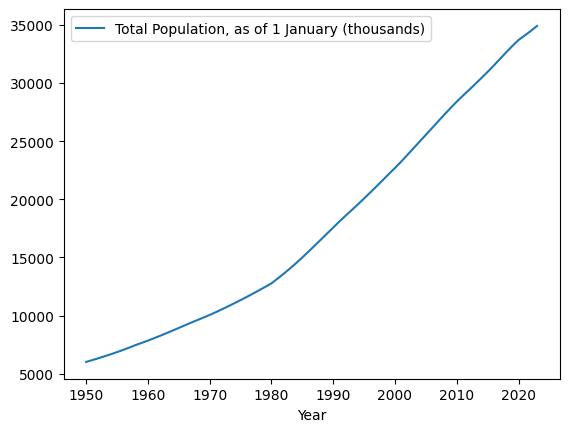

In [32]:
ax = my_population.plot.line(x = "Year", y = "Total Population, as of 1 January (thousands)")